# Polynomial Regression - Soda Sales Predication

* Project Scope: Analyze,Visualize and apply Polynomial Regression model to predict Soda sales based on outside temparature
* Data source: soda.csv file

## Import libraries & Load data

In [2]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('Soda.csv')

## Lets check the data

In [3]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
temperature    50 non-null int64
units_sold     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


* We can see there are 3 Columns and its datatypes:
* Out of 3 columns, 2 are input variables/features (X), 1 output /target variable (y) 
* There are 50 training examples (m)

In [4]:
# Checking for null columns
dataset.isnull().sum()

temperature    0
units_sold     0
dtype: int64

we see that there are no null data in any columns

In [5]:
# lets check the data
dataset.head(5)

,temperature,units_sold
0,44,2600
1,96,12126
2,96,12107
3,36,1639
4,42,2400


Data in this data set is self explanatory

In [6]:
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

## Let's analyze and visualize data

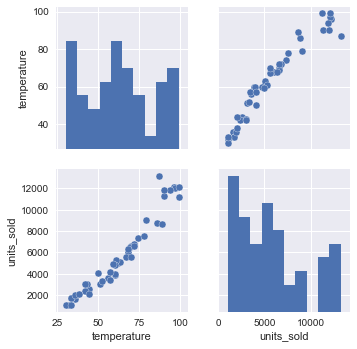

In [7]:
sns.pairplot(dataset)
plt.show()

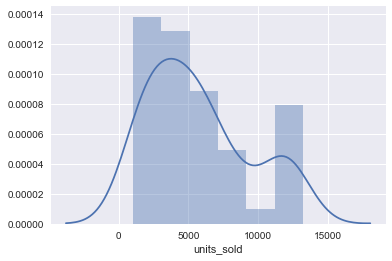

In [8]:
sns.distplot(dataset['units_sold'])
plt.show()

## Spliting data into input and output variables

In [9]:
X = dataset[['temperature']]
y = dataset[['units_sold']]

In [10]:
X.shape

(50, 1)

In [11]:
y.shape

(50, 1)

Note that we have only one feature and corresponding output in this data set 

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Fitting Polynomial Regression & Evaluating the model

In [13]:
# Importing models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Importing metrics module
from sklearn import metrics

# Function for creating plynomial regression model for a given degree
def create_polynomial_regression_model(degree):
    
    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
    r2_train = metrics.r2_score(y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    #*********************************************************************************
    # Use 'return reme_test' in case wanted to get degree of polynomial that has least RMSE
    # otherwise comment this to get the model performance for the training and test set
    #*********************************************************************************
    # return rmse_test
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("Root Mean Squared Error of training set is {}".format(rmse_train))
    print("R Squared score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Root Mean Squared Error of test set is {}".format(rmse_test))
    print("R Squared score score of test set is {}".format(r2_test))

In [14]:
create_polynomial_regression_model(4)

The model performance for the training set
-------------------------------------------
Root Mean Squared Error of training set is 666.0673686603203
R Squared score of training set is 0.9637128584787967


The model performance for the test set
-------------------------------------------
Root Mean Squared Error of test set is 705.6284479801533
R Squared score score of test set is 0.9649207431006438


In [15]:
#*********************************************************************************
# If trying to find polynomial degree that best fits our data use this 
#*********************************************************************************
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    rmse_test = create_polynomial_regression_model(deg)
    rmses.append(rmse_test)
    # Cross-validation of degree
    if min_rmse > rmse_test:
        min_rmse = rmse_test
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

The model performance for the training set
-------------------------------------------
Root Mean Squared Error of training set is 962.2632154835592
R Squared score of training set is 0.9242636777801455


The model performance for the test set
-------------------------------------------
Root Mean Squared Error of test set is 728.4151110533934
R Squared score score of test set is 0.9626185523955227


TypeError: '>' not supported between instances of 'float' and 'NoneType'

Based on low Root Mean Squared Error and high R Squared score, we can safely say this model is best fit to predict soda sales 

In [16]:
# Visualising the Test & predicted results
poly_features = PolynomialFeatures(4)
 
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(X_test_poly)

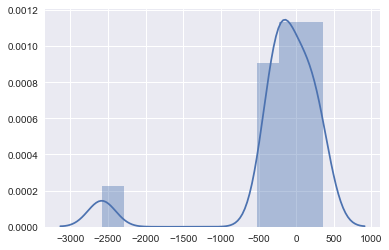

In [17]:
sns.distplot((y_test-y_test_predict));

In [18]:
y_test_predict

array([[ 8790.11360953],
       [ 2756.92577443],
       [ 3368.56514451],
       [ 3456.8763845 ],
       [ 3873.58785284],
       [11973.14347372],
       [11220.67707174],
       [11966.71436881],
       [ 1284.7622721 ],
       [ 2675.5881169 ],
       [ 7434.01686352],
       [11397.56763149],
       [ 5947.05677581],
       [ 1498.38866945],
       [ 4417.84640198]])

In [19]:
y_test

,units_sold
32,9036
31,3036
16,3083
36,3294
24,3576
1,12126
47,8638
13,12055
38,1094
4,2400


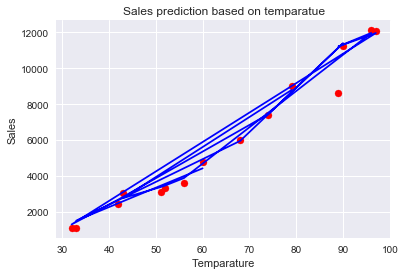

In [20]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test, poly_model.predict(poly_features.fit_transform(X_test)), color='blue')
plt.title('Sales prediction based on temparatue')
plt.xlabel('Temparature')
plt.ylabel('Sales')
plt.show()

In [23]:
coeff_df = pd.DataFrame(poly_model.coef_)
coeff_df

,0,1,2,3,4
0,0.0,2539.887655,-66.630917,0.766421,-0.003087


To conclude our model got 96% accuracy in predecitng the outcome wiith temperature being the most significant feature